In [1]:
import os
import matplotlib.pyplot as plt
import glob
import pickle
from keras.utils import to_categorical

from pkl_reader import *
from lstm_impl import CombinedLSTM
from kf_impl import EKF_CV_MODEL
from utils import sup_plot, extract_data

Using TensorFlow backend.


In [5]:
# Get the data
pklfiles_to_process = glob.glob('./dataset/*.pkl')
pklfiles_to_process.sort()
print('Found %d pkl files: %s' % (len(pklfiles_to_process), pklfiles_to_process))

file_num = 0

pklfile = pklfiles_to_process[file_num]

test_set  = {"history_traj_data" : None,
             "future_traj_data"  : None,
             "goal_position"     : None,
             "one_hot_goal"      : None}
test_set_kf  = {"history_traj_data" : None,
             "future_traj_data"  : None,
             "goal_position"     : None,
             "one_hot_goal"      : None}

test_set['history_traj_data'], test_set['future_traj_data'], test_set['goal_position'], test_set['one_hot_goal'], traj_idx = extract_data(pklfile, full_traj=True, crop_traj=True)
test_set_kf['history_traj_data'], test_set_kf['future_traj_data'], test_set_kf['goal_position'], test_set_kf['one_hot_goal'], traj_idx_kf = extract_data(pklfile, full_traj=True, crop_traj=False)

Found 6 pkl files: ['./dataset/pilot_dataset_12_08_13_02_29.pkl', './dataset/pilot_dataset_12_08_13_02_29_fold_0.pkl', './dataset/pilot_dataset_12_08_13_02_29_fold_1.pkl', './dataset/pilot_dataset_12_08_13_02_29_fold_2.pkl', './dataset/pilot_dataset_12_08_13_02_29_fold_3.pkl', './dataset/pilot_dataset_12_08_13_02_29_fold_4.pkl']


In [6]:
# Build the model
history_shape = test_set['history_traj_data'].shape
goals_position_shape = test_set['goal_position'].shape
one_hot_goal_shape = test_set['one_hot_goal'].shape
future_shape = test_set['future_traj_data'].shape
hidden_dim = 100
beta = 0.
gamma = 10.
use_goal_info = True
comb_lstm = CombinedLSTM(history_shape, goals_position_shape, one_hot_goal_shape, future_shape, hidden_dim, beta, gamma, use_goal_info)
# comb_lstm.load('file_name')
# comb_lstm.goal_model.load()
# comb_lstm.traj_model.load()

Train on 1763 samples, validate on 1763 samples
Epoch 1/100
1763/1763 [==============================] - 1s 574us/step - loss: 9.4587 - top_k_acc: 0.4107 - val_loss: 4.9766 - val_top_k_acc: 0.5735
Epoch 2/100
1763/1763 [==============================] - 0s 219us/step - loss: 3.9982 - top_k_acc: 0.6517 - val_loss: 3.3482 - val_top_k_acc: 0.7226
Epoch 3/100
1763/1763 [==============================] - 0s 217us/step - loss: 3.1683 - top_k_acc: 0.7351 - val_loss: 2.8995 - val_top_k_acc: 0.7691
Epoch 4/100
1763/1763 [==============================] - 0s 216us/step - loss: 2.6183 - top_k_acc: 0.7992 - val_loss: 2.2222 - val_top_k_acc: 0.8310
Epoch 5/100
1763/1763 [==============================] - 0s 214us/step - loss: 2.1547 - top_k_acc: 0.8463 - val_loss: 1.8715 - val_top_k_acc: 0.8928
Epoch 6/100
1763/1763 [==============================] - 0s 216us/step - loss: 1.8086 - top_k_acc: 0.8860 - val_loss: 1.5892 - val_top_k_acc: 0.9070
Epoch 7/100
1763/1763 [==============================] - 0

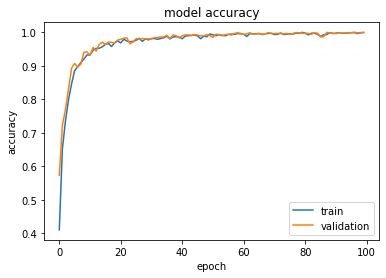

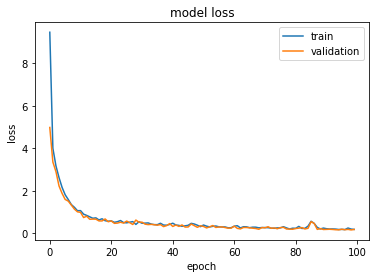

Train on 1763 samples, validate on 1763 samples
Epoch 1/100
1763/1763 [==============================] - 2s 1ms/step - loss: 1.6430 - accuracy: 0.7424 - val_loss: 0.5607 - val_accuracy: 0.9367
Epoch 2/100
1763/1763 [==============================] - 1s 771us/step - loss: 0.4971 - accuracy: 0.9425 - val_loss: 0.4698 - val_accuracy: 0.9466
Epoch 3/100
1763/1763 [==============================] - 1s 771us/step - loss: 0.4292 - accuracy: 0.9488 - val_loss: 0.4105 - val_accuracy: 0.9456
Epoch 4/100
1763/1763 [==============================] - 1s 768us/step - loss: 0.4058 - accuracy: 0.9461 - val_loss: 0.4302 - val_accuracy: 0.9503
Epoch 5/100
1763/1763 [==============================] - 1s 777us/step - loss: 0.4048 - accuracy: 0.9474 - val_loss: 0.4161 - val_accuracy: 0.9491
Epoch 6/100
1763/1763 [==============================] - 1s 798us/step - loss: 0.3879 - accuracy: 0.9466 - val_loss: 0.4899 - val_accuracy: 0.9503
Epoch 7/100
1763/1763 [==============================] - 1s 831us/step -

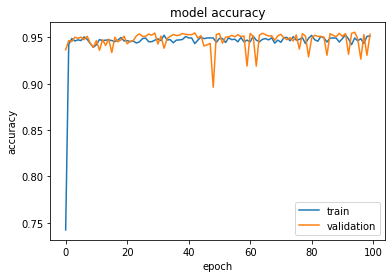

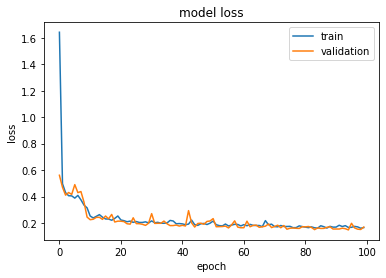

In [7]:
comb_lstm.fit(test_set, test_set,verbose=1)

In [8]:
comb_lstm.save('./model/test')

In [9]:
#comb_lstm.load('./model/LSTM_h100_b1.000_fold0')
comb_lstm.load('./model/test')

In [10]:
top_k_goal = [0, 1, 2]
goal_pred, traj_pred_dict = comb_lstm.predict(test_set, top_k_goal=top_k_goal)
print(traj_pred_dict[0].shape)

(1763, 20, 2)


In [ ]:
kf = EKF_CV_MODEL(x_init=np.zeros(5), P_init=np.eye(5), R=np.diag([1e-3]*3), dt=0.1)

In [ ]:
kf.load('./model/EKF_CV_fold0.pkl')
goal_pred, traj_pred_dict = kf.predict(test_set_kf)

In [11]:
sup_plot('test_lstm', test_set, traj_idx, goal_pred, traj_pred_dict, limit=2)

test_lstm: Start processing trajectory # 000 .....
test_lstm: Trajectory # 000 movie saved successfully.
test_lstm: Start processing trajectory # 001 .....
test_lstm: Trajectory # 001 movie saved successfully.


In [7]:
# for i in range(len(traj_idx) - 1)

# Plot the result
goal_ind = np.arange(33)
bar_width = 0.35
# Recover the goal coordinates
test_goals_coords = test_set['goal_position'].reshape((test_set['goal_position'].shape[0], 32, 3))
test_hist_traj    = test_set['history_traj_data']
test_future_traj  = test_set['future_traj_data']
test_one_hot_goal = test_set['one_hot_goal']

for num_traj in range(2):
    
    print("Start processing trajectory # %03d ....." % num_traj)
    start_idx = traj_idx[num_traj]
    end_idx   = traj_idx[num_traj+1]
    directory = './figures/%03d' % num_traj
    if not os.path.exists(directory):
        os.mkdir(directory)

    for i in range(start_idx, end_idx):

        fig = plt.figure(dpi=200)
        plt.suptitle('LSTM', va='center')
        plt.subplot(211)

        vector = test_goals_coords[i][-3,:2] - test_goals_coords[i][-1,:2]
        th = np.arctan2(vector[1], vector[0])
        R = np.array([[ np.cos(th), np.sin(th)], \
                      [-np.sin(th), np.cos(th)]])

        # Plot the vehicle trajectory in the snippet
        test_hist_traj_rot = test_hist_traj[i][:,:2] @ R.T
        test_future_traj_rot = test_future_traj[i][:,:2] @ R.T
        plt.plot(test_hist_traj_rot[:,0], test_hist_traj_rot[:,1], 'k')
        plt.plot(test_future_traj_rot[:,0], test_future_traj_rot[:,1], color = '#1f77b4')
        
        probs = goal_pred[i].copy()
        prob_undetermined = probs[-1]
        probs.sort()
        for top_k, traj_pred in traj_pred_dict.items():
            traj_pred_rot      = traj_pred[i][:, :2] @ R.T
            prob = probs[-1-top_k]
            plt.plot(traj_pred_rot[:,0], traj_pred_rot[:,1], '.', markersize = 3, color = '#ff770e', alpha= prob)

        # Plot the occupancy in the snippet
        test_goals_coords_rot = test_goals_coords[i][:,:2] @ R.T
        for goal, occup in zip(test_goals_coords_rot, test_goals_coords[i]):
            if occup[2] > 0:
                plt.plot(goal[0], goal[1], 'ko', fillstyle='none', markersize = 9)
            else:
                plt.plot(goal[0], goal[1], 'ko', markersize = 9)

        # Get the ground truth intention
        gt_idx = np.argmax(test_one_hot_goal[i])
        # Predictions above a threshold
        thres = 1e-2
        
        best_k_idx = [np.argsort(goal_pred[i])[-1-k] for k in top_k_goal]
#         best_k_idx = [k for k, p in enumerate(goal_pred[i]) if p >= thres]
#         print(np.max(goal_pred[i]))
        if gt_idx == 32: # If it is "-1" -> undetermined 
            plt.plot(0, 0, 'v', fillstyle='bottom', color = '#1f77b4', markersize = 9)
        else:
            plt.plot(test_goals_coords_rot[gt_idx][0], test_goals_coords_rot[gt_idx][1], 'o', fillstyle='bottom', color = '#1f77b4', markersize = 9)

        for j in best_k_idx:
            if j == 32:
                plt.plot(0, 0, 'v', fillstyle='none', color = '#ff770e', markersize = 9, alpha=prob_undetermined)
            else:
                plt.plot(test_goals_coords_rot[j][0], test_goals_coords_rot[j][1], 'o', fillstyle='none', color = '#ff770e', markersize = 9)

        plt.title('Trajectory and Spots in Ego Frame')
        plt.xlabel('x (m)')
        plt.ylabel('y (m)')
    #     plt.axis('equal')

        plt.subplot(212)
        p1 = plt.bar(goal_ind - bar_width/2, test_one_hot_goal[i], bar_width, label='GT')
        p2 = plt.bar(goal_ind + bar_width/2, goal_pred[i], bar_width, label='Pred')
        plt.xlabel('Goal Index')
        plt.ylabel('Probability')
        plt.title('Likelihood of Selecting Different Goals')
        plt.legend()
        plt.tight_layout()
        
        
        fig.savefig('./figures/%03d/frame_%03d.png' % (num_traj, i-start_idx))
        plt.close(fig)
        
    fps = 2
    mv = os.system("ffmpeg -r {0:d} -i ./figures/{1:03d}/frame_%03d.png -vcodec mpeg4 -y ./figures/{1:03d}_movie.mp4".format(fps, num_traj) )
    if mv == 0:
        print("Trajectory # %03d movie saved successfully." % num_traj)
    else:
        print("Meet problem saving Trajectory # %03d movie." % num_traj)

Start processing trajectory # 000 .....
Trajectory # 000 movie saved successfully.
Start processing trajectory # 001 .....
Trajectory # 001 movie saved successfully.
